# IMPORT LIBRARIES

In [261]:
# importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import math
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


## IMPORT DATASET

In [2]:
cust_churn_data = pd.read_excel("customer retail dataset.xlsx") # load dataset for customer churn analysis
cust_churn_data.transpose() # transpose row and columns, so all features can be viewed.

,0,1,2,3,4,5,6,7,8,9,...,5620,5621,5622,5623,5624,5625,5626,5627,5628,5629
CustomerID,50001,50002,50003,50004,50005,50006,50007,50008,50009,50010,...,55621,55622,55623,55624,55625,55626,55627,55628,55629,55630
Churn,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
Tenure,4,NaN,NaN,0,0,0,NaN,NaN,13,NaN,...,3,14,13,5,1,10,13,1,23,8
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone,Computer,Phone,Phone,Phone,Phone,...,Mobile Phone,Mobile Phone,Mobile Phone,Computer,Mobile Phone,Computer,Mobile Phone,Mobile Phone,Computer,Mobile Phone
CityTier,3,1,1,3,1,1,3,1,3,1,...,1,3,3,1,3,1,1,1,3,1
WarehouseToHome,6,8,30,15,12,22,11,6,9,31,...,35,35,31,12,12,30,13,11,9,15
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC,Debit Card,Cash on Delivery,CC,E wallet,Debit Card,...,Credit Card,E wallet,E wallet,Credit Card,UPI,Credit Card,Credit Card,Debit Card,Credit Card,Credit Card
Gender,Female,Male,Male,Male,Male,Female,Male,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male
HourSpendOnApp,3,3,2,2,NaN,3,2,3,NaN,2,...,4,3,3,4,2,3,3,3,4,3
NumberOfDeviceRegistered,3,4,4,4,3,5,3,3,4,5,...,5,5,5,4,5,2,5,2,5,2


In [3]:
cust_churn_data.replace({"CC": 'codcredit','COD': 'coddebit','Phone' : 'Tablet','Mobile':'Assc'}, inplace=True)
cust_churn_data

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Tablet,1,8.0,UPI,Male,3.0,4,Assc,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Tablet,1,30.0,Debit Card,Male,2.0,4,Assc,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Tablet,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Tablet,1,12.0,codcredit,Male,NaN,3,Assc,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
cust_churn_data.columns # viewing the feature names in dataset

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

In [5]:
# Description 
describe = cust_churn_data.describe().transpose()
describe # Stat values of data- default numerical features

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [6]:
# description 
obj = cust_churn_data.select_dtypes(include='object')
obj.describe().transpose() # categorical variables description

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [7]:
cust_churn_data['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Tablet          1231
Name: PreferredLoginDevice, dtype: int64

In [8]:
cust_churn_data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
coddebit             365
codcredit            273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [9]:
cust_churn_data['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [10]:
cust_churn_data['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Assc                   809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [11]:
cust_churn_data['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [12]:
# attribute information
cust_churn_data.info() # info about each column null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
cust_churn_data.isnull().sum() # count of null values

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Text(0.5, 1.0, 'DATA BEFORE CLEANING')

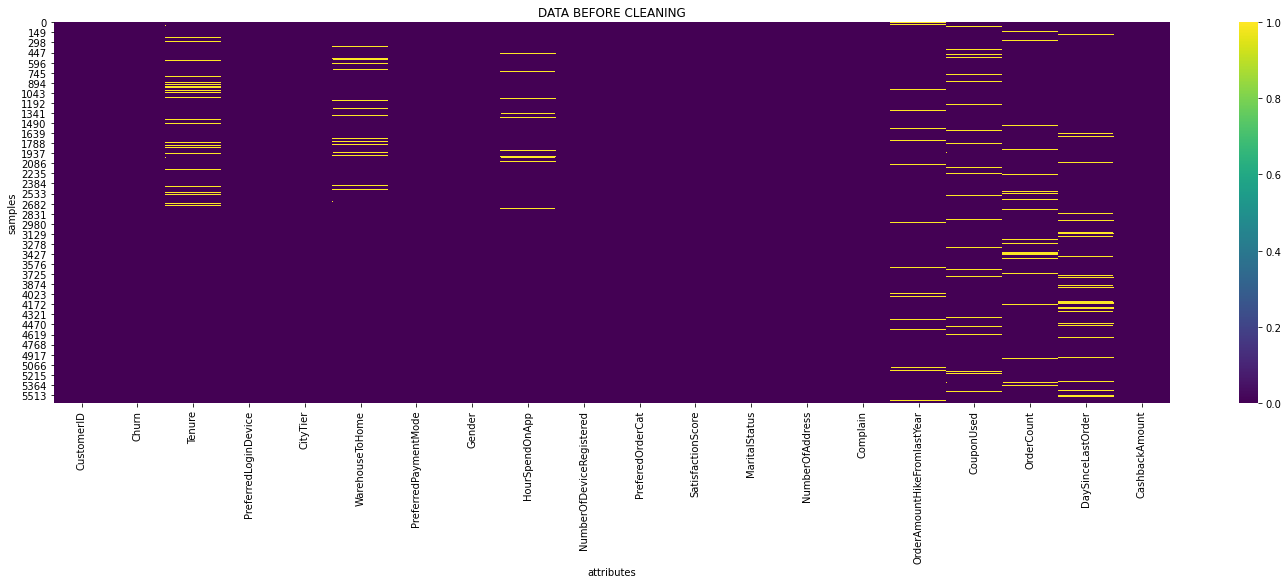

In [14]:
# plotting null values
plt.figure(figsize=(25,7))
sb.heatmap(cust_churn_data.isnull(),cmap='viridis')
plt.xlabel('attributes')
plt.ylabel('samples')
plt.title('DATA BEFORE CLEANING')

In [15]:
cust_churndata = cust_churn_data.dropna() # dropping null values
cust_churndata  = cust_churndata.drop('CustomerID',axis=1)
cust_churndata

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,1,0.0,Tablet,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,1,0.0,Tablet,1,11.0,coddebit,Male,2.0,3,Assc,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Text(0.5, 1.0, 'CLEANED DATASET')

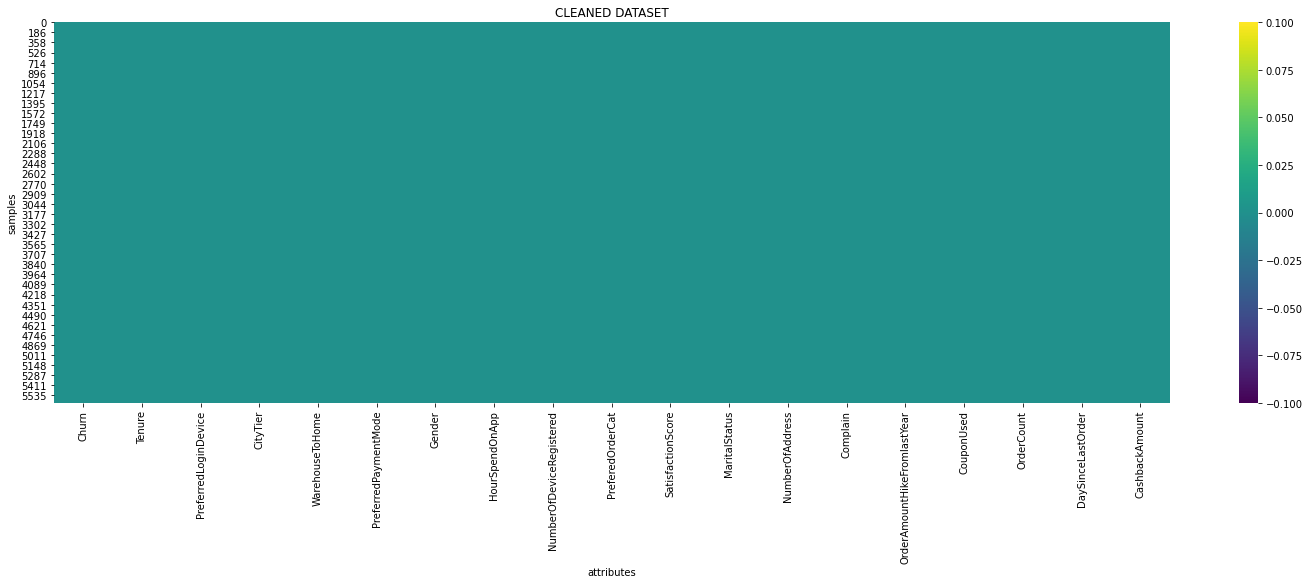

In [16]:
#plotting cleaned data
plt.figure(figsize=(25,7))
sb.heatmap(cust_churndata.isnull(),cmap='viridis')
plt.xlabel('attributes')
plt.ylabel('samples')
plt.title('CLEANED DATASET')

In [262]:
# correlation
correlation = cust_churndata.corr() # analyzing relation between variables using correlation
correlation

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.340013,0.003295,0.073858,0.087318,0.071921,0.033792,0.060845,0.149041,0.066824,0.095759,0.134036,0.076336,0.238137,0.017193,0.010982,-0.001962,-0.139254,-0.058756
Tenure,-0.340013,1.000000,-0.048473,-0.057414,-0.016353,-0.042965,-0.052123,-0.029818,-0.058752,-0.147577,-0.009972,-0.081435,0.196547,-0.035228,0.012197,0.075959,0.112339,0.118932,0.213852
PreferredLoginDevice,0.003295,-0.048473,1.000000,-0.071393,-0.027440,0.020444,-0.006216,-0.070811,-0.064928,0.006379,0.051835,-0.009239,-0.024550,0.010542,-0.003236,-0.062269,-0.080273,-0.092897,-0.227858
CityTier,0.073858,-0.057414,-0.071393,1.000000,0.004457,0.097013,-0.018072,-0.070035,-0.008616,-0.129235,-0.019494,0.002131,-0.046406,-0.006122,-0.027628,0.013313,0.035018,0.014304,0.146569
WarehouseToHome,0.087318,-0.016353,-0.027440,0.004457,1.000000,-0.012441,0.035581,0.052731,0.024582,-0.004218,0.000434,-0.014361,0.003422,0.003829,0.031975,-0.014311,0.008800,0.010646,-0.012433
PreferredPaymentMode,0.071921,-0.042965,0.020444,0.097013,-0.012441,1.000000,0.043506,-0.047828,-0.001452,-0.036977,0.006645,0.007035,-0.007929,-0.003286,-0.058176,-0.011524,-0.028073,0.004405,-0.086134
Gender,0.033792,-0.052123,-0.006216,-0.018072,0.035581,0.043506,1.000000,-0.009952,-0.026706,0.029726,-0.032398,-0.013064,-0.030980,-0.039522,0.010081,-0.041493,-0.035418,-0.018478,-0.020263
HourSpendOnApp,0.060845,-0.029818,-0.070811,-0.070035,0.052731,-0.047828,-0.009952,1.000000,0.293021,0.276618,0.039879,-0.035861,0.124962,0.020413,0.096827,0.160239,0.092601,0.019526,0.131281
NumberOfDeviceRegistered,0.149041,-0.058752,-0.064928,-0.008616,0.024582,-0.001452,-0.026706,0.293021,1.000000,0.206970,-0.017788,0.049701,0.066684,0.018881,0.083342,0.114066,0.069559,-0.049817,0.113504
PreferedOrderCat,0.066824,-0.147577,0.006379,-0.129235,-0.004218,-0.036977,0.029726,0.276618,0.206970,1.000000,0.000948,0.009295,0.029595,0.012382,0.102145,0.004215,-0.080369,-0.146687,-0.284845


Text(0.5, 1.0, 'Correlation Output')

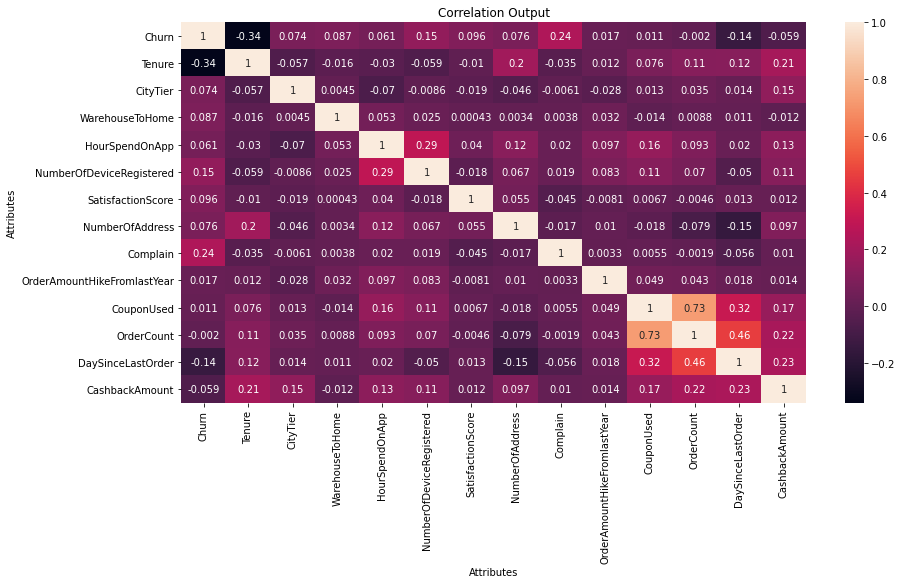

In [18]:
# correlogram
plt.figure(figsize=(14,7))
sb.heatmap(correlation,annot = True) # plot correlation plot
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.title('Correlation Output')

##### outlier check - boxplot

Text(0.5, 1.0, 'OrderAmountHikeFromlastYear')

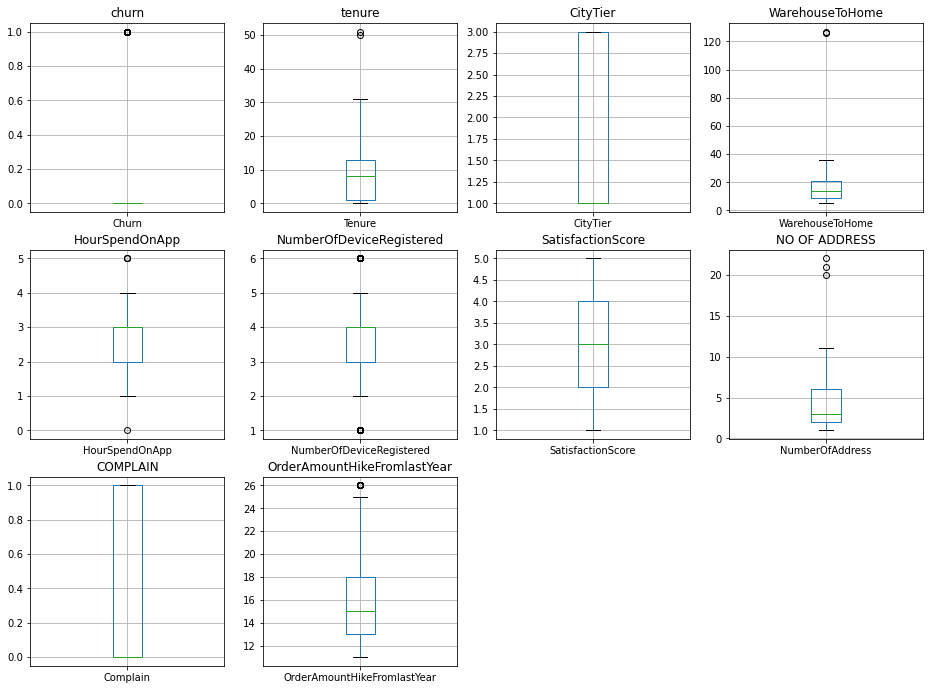

In [19]:
plt.figure(figsize=(16,16))

plt.subplot(4,4,1)
cust_churndata.boxplot(column=['Churn'])
plt.title('churn')

plt.subplot(4,4,2)
cust_churndata.boxplot(column=['Tenure'])
plt.title('tenure')

plt.subplot(4,4,3)
cust_churndata.boxplot(column=['CityTier'])
plt.title('CityTier')

plt.subplot(4,4,4)
cust_churndata.boxplot(column=['WarehouseToHome'])
plt.title('WarehouseToHome')


plt.subplot(4,4,5)
cust_churndata.boxplot(column=['HourSpendOnApp'])
plt.title('HourSpendOnApp')


plt.subplot(4,4,6)
cust_churndata.boxplot(column=['NumberOfDeviceRegistered'])
plt.title('NumberOfDeviceRegistered')


plt.subplot(4,4,7)
cust_churndata.boxplot(column=['SatisfactionScore'])
plt.title('SatisfactionScore')


plt.subplot(4,4,8)
cust_churndata.boxplot(column=['NumberOfAddress'])
plt.title('NO OF ADDRESS')


plt.subplot(4,4,9)
cust_churndata.boxplot(column=['Complain'])
plt.title('COMPLAIN')


plt.subplot(4,4,10)
cust_churndata.boxplot(column=['OrderAmountHikeFromlastYear'])
plt.title('OrderAmountHikeFromlastYear')







 There no outliers , the points are less count values

## DATA VISUALIZATION

###### distribution of data

Text(0.5, 1.0, 'spread of num attr')

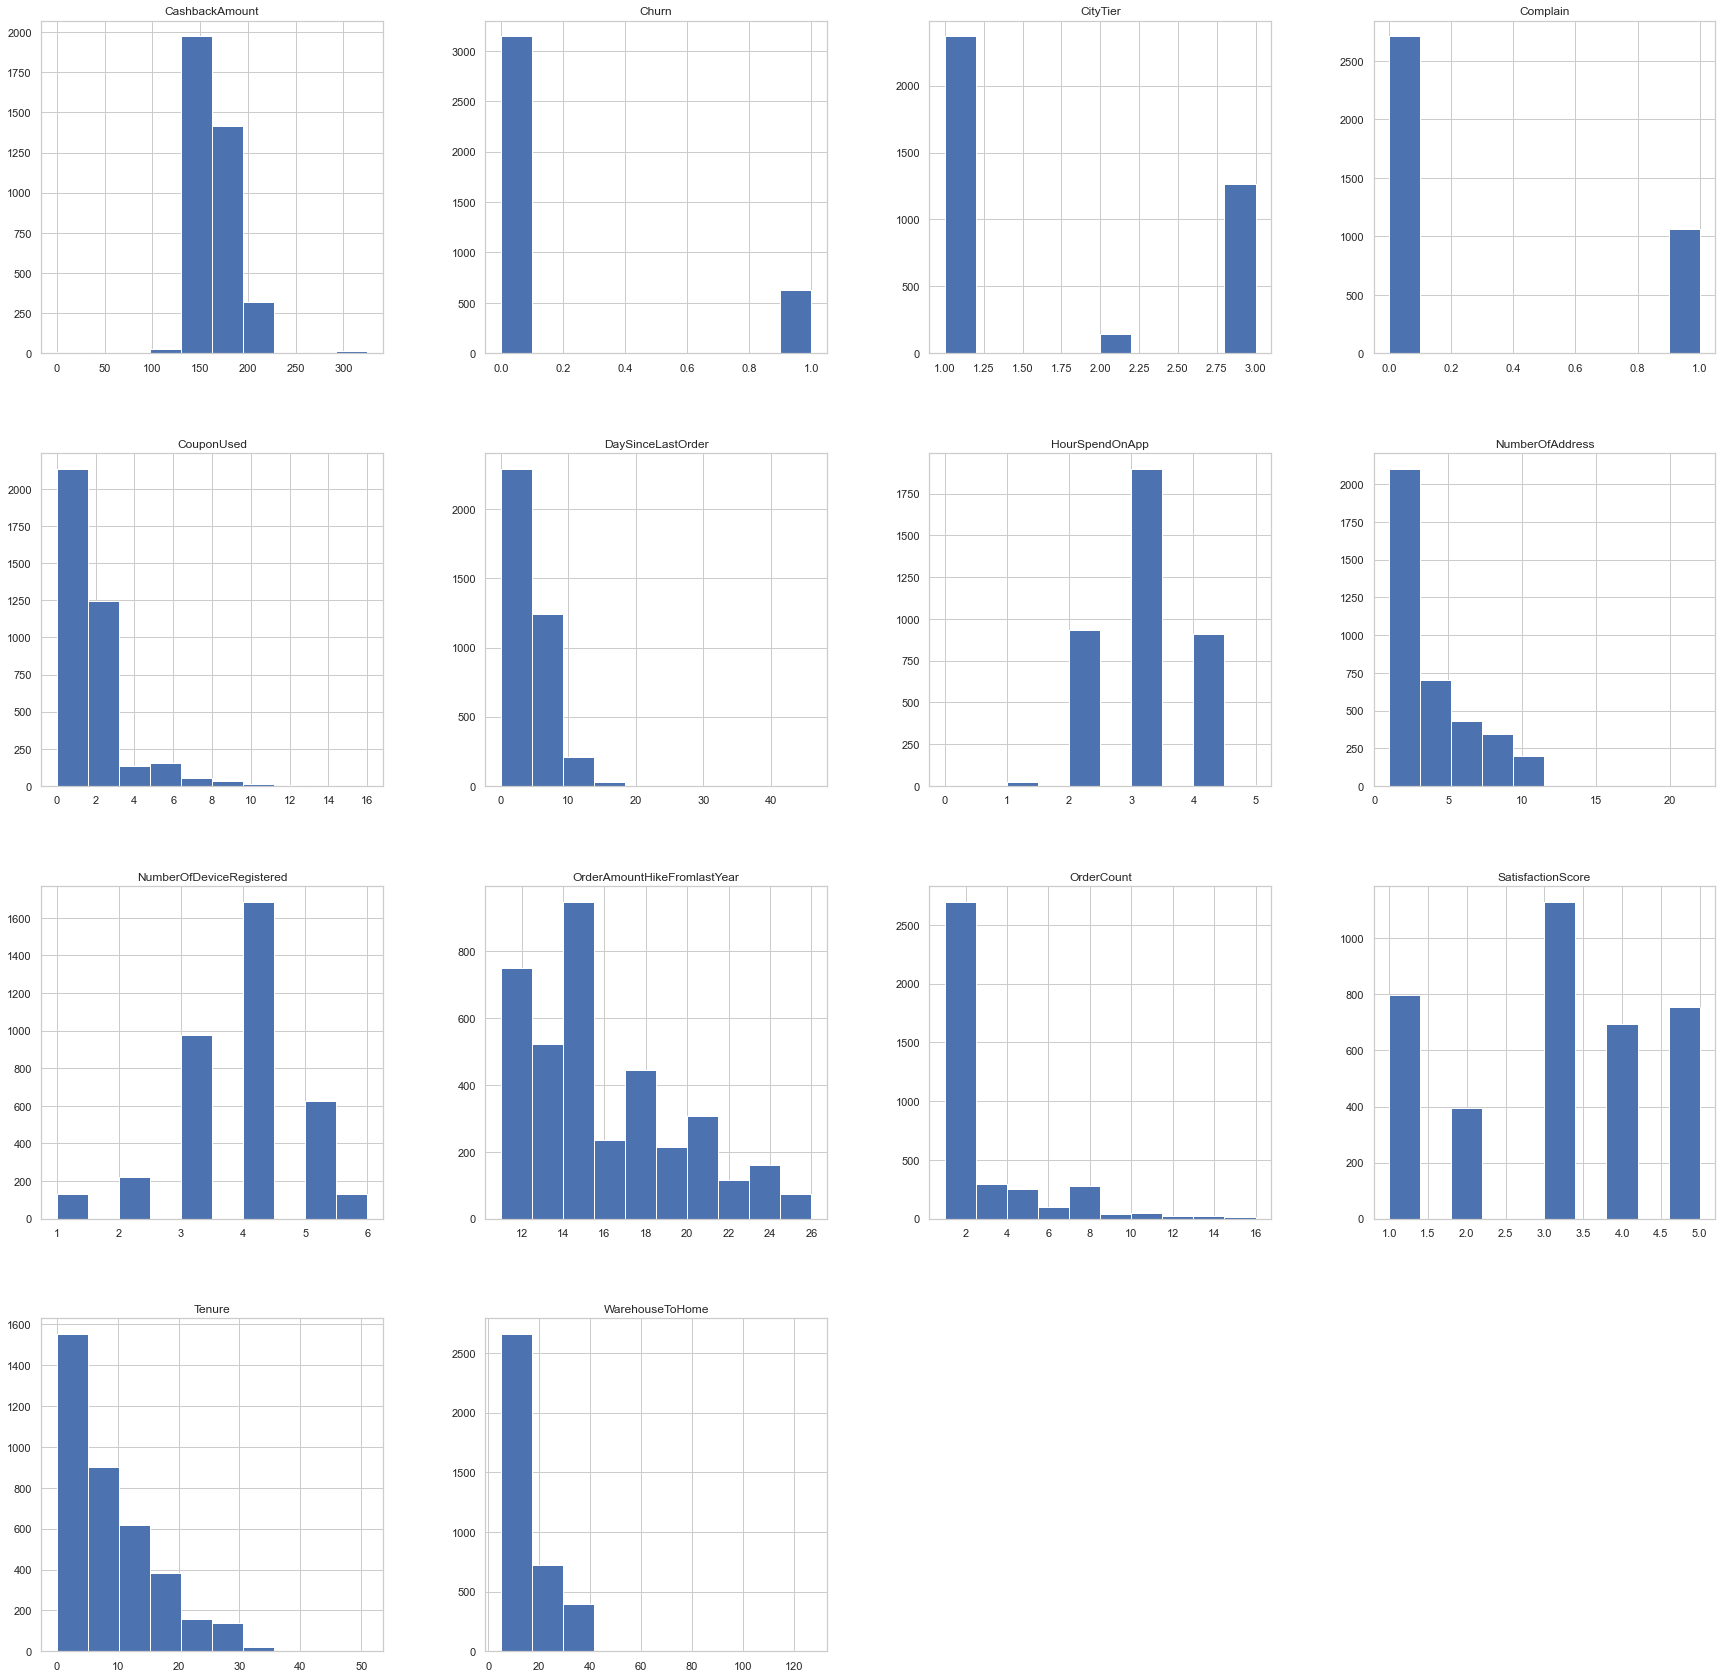

In [20]:
sb.set(style="whitegrid")
histplot = cust_churndata.select_dtypes(exclude = 'object').hist(figsize=(30,30))  #spread of each data attributes
plt.title('spread of num attr')


###### churn analysis factors

Text(0.5, 1.0, 'BASED ON RESIDENCE')

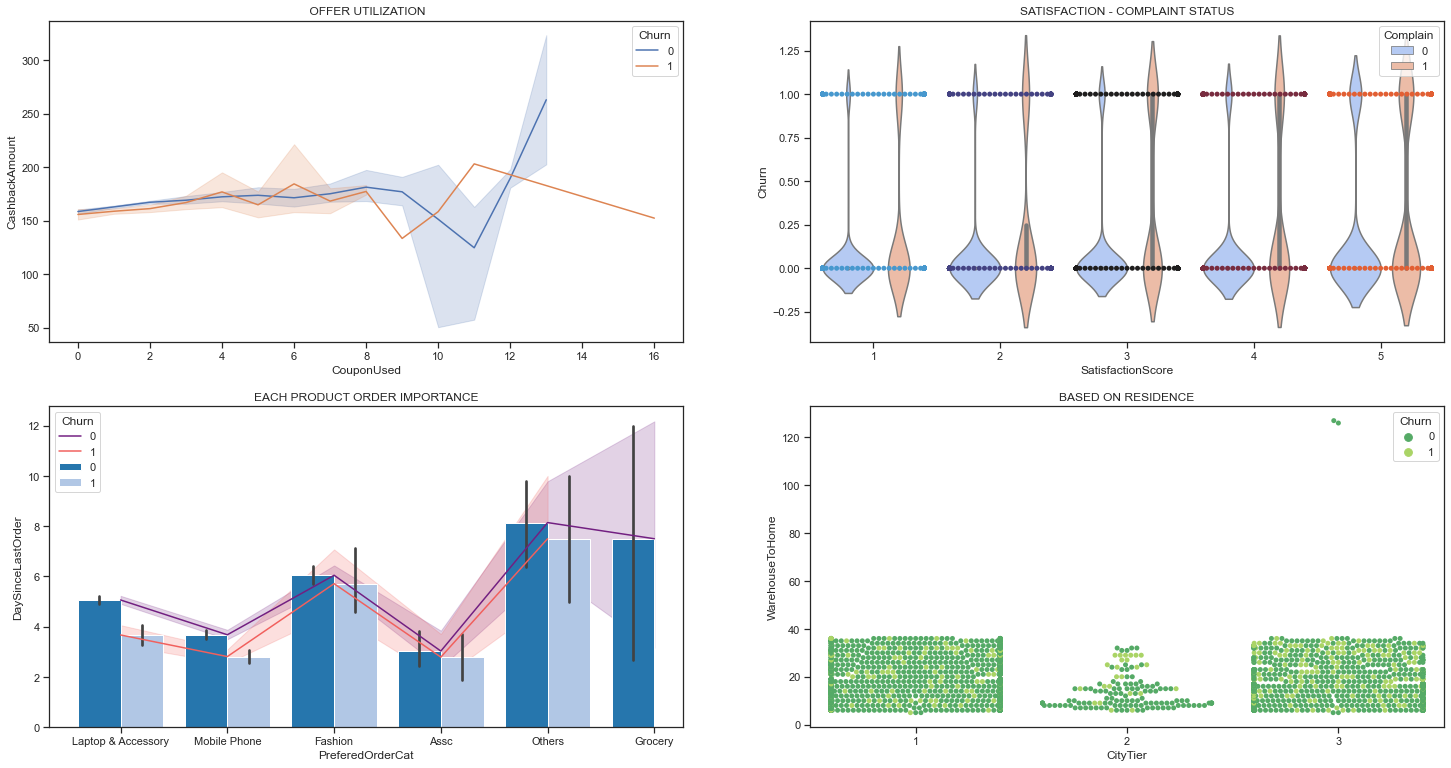

In [21]:
sb.set_style('ticks')
plt.figure(figsize=(25,13))


plt.subplot(2,2,1)
sb.lineplot(x='CouponUsed',y='CashbackAmount',data=cust_churndata,hue='Churn') 
plt.title(' OFFER UTILIZATION')

plt.subplot(2,2,2)
sb.violinplot(y='Churn',x='SatisfactionScore',data=cust_churndata,hue='Complain', palette='coolwarm',) 
sb.swarmplot(y='Churn',x='SatisfactionScore',data=cust_churndata,palette='icefire')
plt.title('SATISFACTION - COMPLAINT STATUS')

plt.subplot(2,2,3)
sb.barplot(x='PreferedOrderCat',y='DaySinceLastOrder',data=cust_churndata,hue='Churn',palette='tab20',saturation=0.90)
sb.lineplot(x='PreferedOrderCat',y='DaySinceLastOrder',data=cust_churndata,hue='Churn',palette='magma')
plt.title('EACH PRODUCT ORDER IMPORTANCE')

plt.subplot(2,2,4)
sb.swarmplot(x='CityTier',y='WarehouseToHome',data=cust_churndata,hue='Churn',palette='summer')
plt.title('BASED ON RESIDENCE')



###### Order rate analysis factors

Text(0.5, 1.0, 'ORDER RATE ACC TO LOGIN DEVICE FOR EACH CITY TIER')

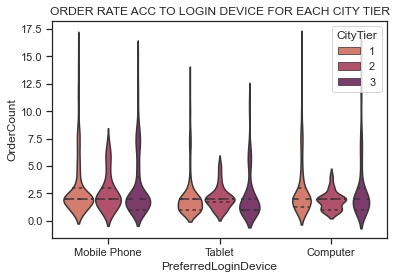

In [22]:
sb.violinplot(x='PreferredLoginDevice',y='OrderCount',data=cust_churndata,hue='CityTier',palette = 'flare',inner='quartile') 
plt.title('ORDER RATE ACC TO LOGIN DEVICE FOR EACH CITY TIER')

Text(0.5, 1.0, 'ORDER RATE FOR EACH PRODUCT CATEGORY')

<Figure size 576x288 with 0 Axes>

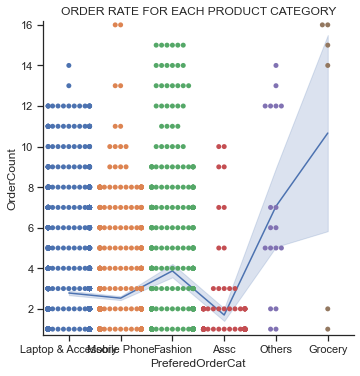

In [23]:
plt.figure(figsize=(8,4))
sb.catplot(y='OrderCount',x='PreferedOrderCat',data=cust_churndata,kind='swarm')
sb.lineplot(y='OrderCount',x='PreferedOrderCat',data=cust_churndata)
plt.title('ORDER RATE FOR EACH PRODUCT CATEGORY')

Text(0.5, 1.0, 'ORDER RATE WITH COUPON USED/')

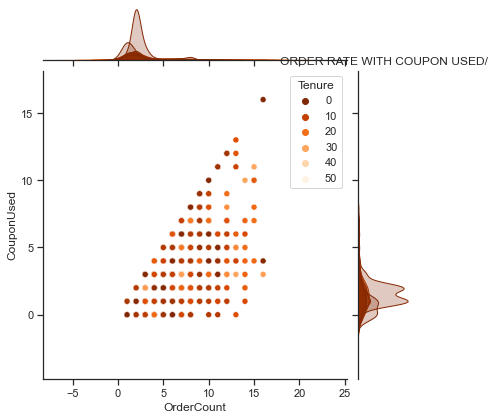

In [24]:
sb.jointplot(x='OrderCount',y='CouponUsed',data=cust_churndata,hue='Tenure',palette='Oranges_r')
plt.title('ORDER RATE WITH COUPON USED/')

Text(0.5, 1.0, ' % of increase in order rate')

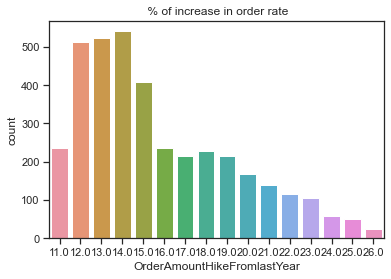

In [26]:
sb.countplot('OrderAmountHikeFromlastYear',data=cust_churndata)
plt.title(' % of increase in order rate')

###### OFFER WITH PAYMENT MODE

Text(0.5, 1.0, 'CAKBACK AMT AVAILED ACC TO PAYMENT MODE AND COUPON')

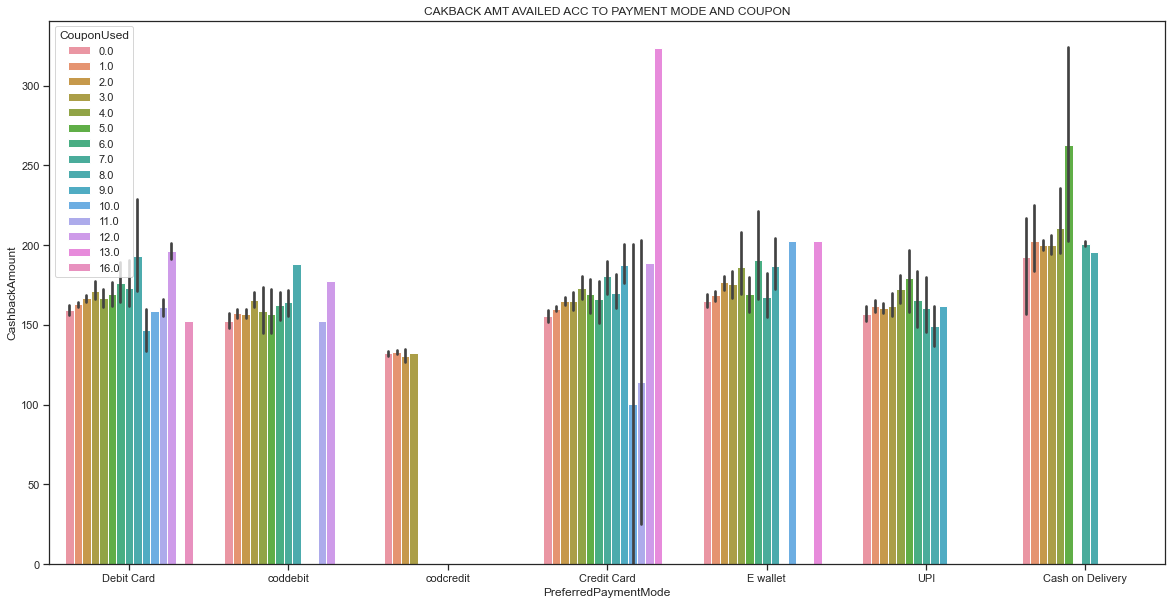

In [27]:
plt.figure(figsize=(20,10))
sb.barplot(x='PreferredPaymentMode',y='CashbackAmount',data=cust_churndata,hue='CouponUsed')
plt.title('CAKBACK AMT AVAILED ACC TO PAYMENT MODE AND COUPON')

######  WIDELY USED LOGIN PLATFORM DIFF WITH GENDER

Text(0.5, 1.0, 'APP PLATFORM COMPAITABLITY')

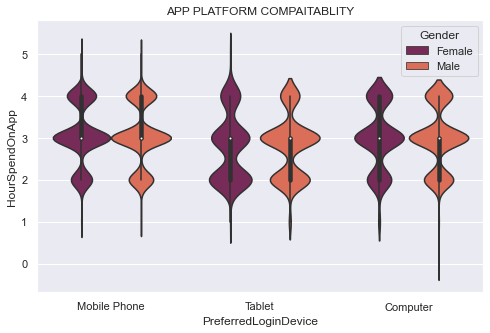

In [28]:
#  says on  which user platform the app is been widely used with gender details
plt.figure(figsize=(8,5))
sb.set_style('darkgrid')
sb.violinplot(x='PreferredLoginDevice',y='HourSpendOnApp',data=cust_churndata,hue='Gender',palette='rocket')
plt.title('APP PLATFORM COMPAITABLITY')

###### SATISFACTION ANALYSIS

Text(0.5, 1.0, 'COMPAIN WITH  FOR SATISFACTION ANALYSIS')

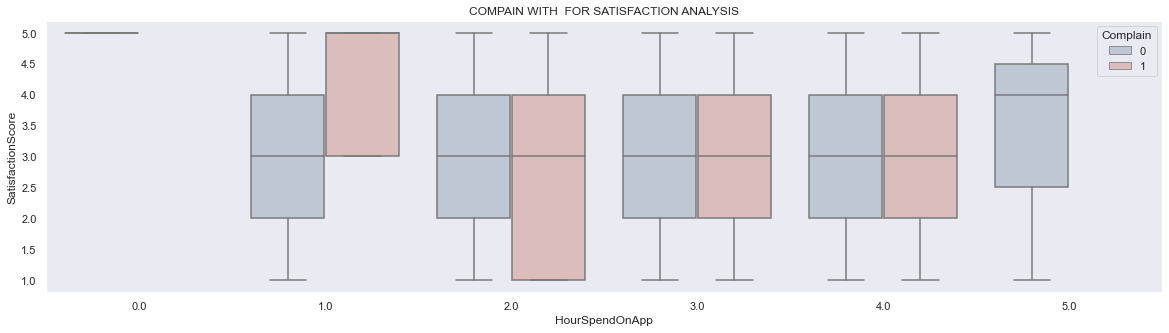

In [29]:
# APP TENURE WITH SATISFACTION AND COMPLAINT STATUS
plt.figure(figsize=(20,5))
sb.set_style('dark')
sb.boxplot(x='HourSpendOnApp',y='SatisfactionScore',data=cust_churndata,hue='Complain',palette = 'vlag')
plt.title('COMPAIN WITH  FOR SATISFACTION ANALYSIS')

Text(0.5, 1.0, ' Satifactory count ')

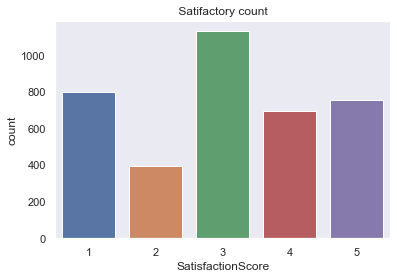

In [30]:
sb.countplot('SatisfactionScore',data=cust_churndata)
plt.title(' Satifactory count ')

###### LABEL ENCODE THE OBJECT VARIABLES TO NUMERICAL

In [31]:
from sklearn.preprocessing import LabelEncoder   #converting obj var to num to train the model

lbl = np.array(cust_churndata.select_dtypes(include ='object').columns)
print(lbl)


for x in lbl:
    cust_churndata[x]= LabelEncoder().fit_transform(cust_churndata[x])
cust_churndata  

['PreferredLoginDevice' 'PreferredPaymentMode' 'Gender' 'PreferedOrderCat'
 'MaritalStatus']


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,3,2,2,9,1,11.0,1.0,1.0,5.0,159.93
3,1,0.0,2,3,15.0,2,1,2.0,4,3,5,2,8,0,23.0,0.0,1.0,3.0,134.07
5,1,0.0,0,1,22.0,2,0,3.0,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139.19
11,1,11.0,1,1,6.0,2,1,3.0,4,1,3,2,10,1,13.0,0.0,1.0,0.0,153.81
12,1,0.0,2,1,11.0,6,1,2.0,3,0,3,2,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,1,3,12.0,4,0,2.0,5,4,3,2,2,0,19.0,2.0,2.0,1.0,154.66
5625,0,10.0,0,1,30.0,1,1,3.0,2,3,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5627,0,1.0,1,1,11.0,2,1,3.0,2,3,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,0,3,9.0,1,1,4.0,5,3,4,1,4,0,15.0,2.0,2.0,9.0,178.90


# TASK 1 : CHURN ANALYSIS

###### GROUPING WITH CHURN

In [263]:
grouped = cust_churndata.groupby('Churn').mean().transpose()
grouped

Churn,0,1
Tenure,9.946548,2.950872
PreferredLoginDevice,0.897232,0.903328
CityTier,1.676742,1.862124
WarehouseToHome,15.407572,17.418384
PreferredPaymentMode,2.245943,2.521395
Gender,0.594337,0.638669
HourSpendOnApp,2.961502,3.079239
NumberOfDeviceRegistered,3.685651,4.095087
PreferedOrderCat,2.972319,3.160063
SatisfactionScore,2.996818,3.353407


###### SPLITING PREDICTOR AND TARGET VARIABLES

In [264]:
# independent variables extraction
x_indep = cust_churndata.drop('Churn',axis=1)
print(x_indep.columns) # viewing the variables of indep 
x_indep

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,1,3,6.0,2,0,3.0,3,3,2,2,9,1,11.0,1.0,1.0,5.0,159.93
3,0.0,2,3,15.0,2,1,2.0,4,3,5,2,8,0,23.0,0.0,1.0,3.0,134.07
5,0.0,0,1,22.0,2,0,3.0,5,4,5,2,2,1,22.0,4.0,6.0,7.0,139.19
11,11.0,1,1,6.0,2,1,3.0,4,1,3,2,10,1,13.0,0.0,1.0,0.0,153.81
12,0.0,2,1,11.0,6,1,2.0,3,0,3,2,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,1.0,1,3,12.0,4,0,2.0,5,4,3,2,2,0,19.0,2.0,2.0,1.0,154.66
5625,10.0,0,1,30.0,1,1,3.0,2,3,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5627,1.0,1,1,11.0,2,1,3.0,2,3,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,23.0,0,3,9.0,1,1,4.0,5,3,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [100]:
#dependent variables 
y_dep = cust_churndata.Churn
y_dep

0       1
3       1
5       1
11      1
12      1
       ..
5624    0
5625    0
5627    0
5628    0
5629    0
Name: Churn, Length: 3774, dtype: int64

###### TRAIN TEST SPLIT 

In [101]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_indep,y_dep,test_size =0.2,random_state=2)

In [102]:
print('x-train:',x_train.shape,'y-train:',y_train.shape)
x_train.head(2)

x-train: (3019, 18) y-train: (3019,)


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2758,0.0,2,1,8.0,4,1,2.0,3,4,3,1,7,1,19.0,0.0,1.0,2.0,139.77
2477,13.0,2,3,20.0,2,0,2.0,3,3,5,1,2,0,15.0,0.0,1.0,2.0,146.39


In [265]:
print('x-test:',x_test.shape,'y-test:',y_test.shape)
y_test

x-test: (755, 18) y-test: (755,)


2593    0
3402    0
3375    0
3634    0
1026    0
       ..
1038    0
5405    0
2943    0
2036    0
4765    0
Name: Churn, Length: 755, dtype: int64

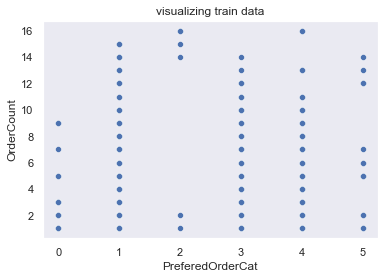

In [104]:
#plot train data 
sb.scatterplot(x='PreferedOrderCat',y='OrderCount',data=x_train)
plt.title('visualizing train data')
plt.show()

In [105]:
#MODEL LIBRARY
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RepeatedStratifiedKFold,RandomizedSearchCV
from numpy import mean , std 

# MODEL 1 -  LOSTIC REGRESSION

In [106]:
#import logistic model lib
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm

In [107]:
#check for significance - pvalue check
mod  = sm.Logit(y_train,x_train)
modfit = mod.fit()
print(modfit)
modfit.summary(2)

Optimization terminated successfully.
         Current function value: 0.306911
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      2   No. Observations:                 3019
Model:                          Logit   Df Residuals:                     3001
Method:                           MLE   Df Model:                           17
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                  0.3258
Time:                        10:11:51   Log-Likelihood:                -926.56
converged:                       True   LL-Null:                       -1374.4
Covariance Type:            nonrobust   LLR p-value:                1.839e-179
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Tenure                         -0.2485      0.015    -16.410      0.000      -0.278      -0.219
PreferredLoginDevice           -0.3845      0.082     -4.672      0.000      -0.546      -0.223
CityTier                        0.1516      0.065      2.347      0.019       0.025       0.278
WarehouseToHome                 0.0235      0.007      3.388      0.001       0.010       0.037
PreferredPaymentMode            0.0168      0.040      0.418      0.676      -0.062       0.096
Gender                          0.1205      0.122      0.991      0.322      -0.118       0.359
HourSpendOnApp                 -0.0627      0.093     -0.674      0.500      -0.245       0.120
NumberOfDeviceRegistered        0.3259      0.066      4.965      0.000       0.197       0.455
PreferedOrderCat               -0.3144      0.061     -5.191      0.000      -0.433      -0.196
SatisfactionScore               0.2281      0.044      5.174      0.000       0.142       0.314
MaritalStatus                   0.4968      0.089      5.587      0.000       0.323       0.671
NumberOfAddress                 0.1982      0.023      8.738      0.000       0.154       0.243
Complain                        1.4362      0.124     11.564      0.000       1.193       1.680
OrderAmountHikeFromlastYear    -0.0396      0.016     -2.463      0.014      -0.071      -0.008
CouponUsed                     -0.0291      0.055     -0.533      0.594      -0.136       0.078
OrderCount                      0.1894      0.043      4.446      0.000       0.106       0.273
DaySinceLastOrder              -0.1316      0.025     -5.306      0.000      -0.180      -0.083
CashbackAmount                 -0.0170      0.003     -6.665      0.000      -0.022      -0.012
===============================================================================================
"""

In [108]:
#drop high pval col and split train test 
px_indep = cust_churndata.drop(['OrderAmountHikeFromlastYear','CouponUsed','HourSpendOnApp','PreferredPaymentMode','Churn'],axis=1)
from sklearn.model_selection import train_test_split
px_train,px_test,py_train,py_test = train_test_split(px_indep,y_dep,test_size =0.2,random_state=2)

In [109]:
# train with significant attrb
# l1 penalty(lasso regression is used) with liblinear, multiclass=ovr(binary data)
lrmod = LogisticRegression(solver='liblinear', C=0.09, random_state=2,multi_class='ovr',penalty='l1',max_iter=100)
lrmodfit = lrmod.fit(px_train,y_train)
lrmodfit
print(lrmodfit.classes_,'dependent classes')

[0 1] dependent classes


In [224]:
# predict with significnt attr
predictlr =lrmodfit.predict(px_test)
predictlr

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
cnf_matrix = confusion_matrix(y_test,predictlr)
cnf_matrix

array([[618,  18],
       [ 69,  50]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

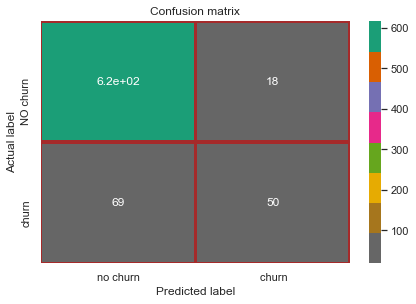

In [113]:
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True,linecolor='brown',linewidths='2.6', cmap='Dark2_r' ,xticklabels=['no churn',' churn'], yticklabels=['NO churn','churn'])
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [114]:
#classification report
print("LOGISTIC:",
      classification_report(y_test,predictlr))

LOGISTIC:               precision    recall  f1-score   support

           0       0.90      0.97      0.93       636
           1       0.74      0.42      0.53       119

    accuracy                           0.88       755
   macro avg       0.82      0.70      0.73       755
weighted avg       0.87      0.88      0.87       755



Text(0.5, 1.0, 'ACTUAL VS PREDICT OUTCOME- LOGISTIC REGRESSION CHURN ANALYSIS')

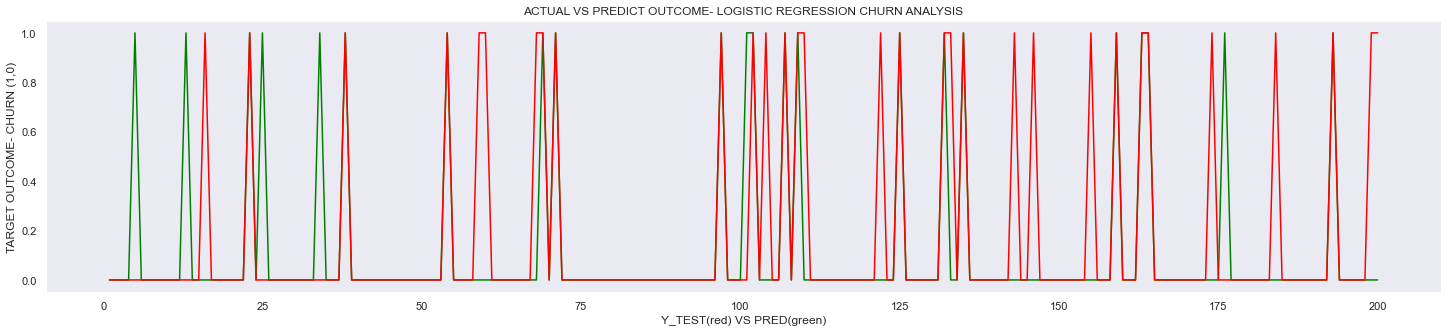

In [116]:
df = pd.DataFrame({'x':range(1,756),'orginal':y_test,'logistic_predict':predictlr})
df
plt.figure(figsize=(25,5))
Y =sb.lineplot(y='logistic_predict',x='x',data=df.head(200),color='green')
sb.lineplot(y='orginal',x='x',data=df.head(200),color='red')
plt.xlabel('Y_TEST(red) VS PRED(green)')
plt.ylabel('TARGET OUTCOME- CHURN (1,0)')
plt.title('ACTUAL VS PREDICT OUTCOME- LOGISTIC REGRESSION CHURN ANALYSIS')

for approx 10% of data green and red lines donot coincide, i.e some points are wrongly predicted

### ROC-AUC

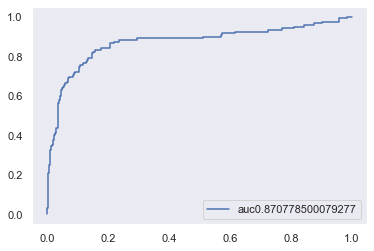

In [117]:
from sklearn import metrics
y_pred_proba = lrmod.predict_proba(px_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc"+str(auc))
plt.legend(loc=4)
plt.show()

In [118]:
lrroc = LogisticRegression(class_weight="balanced")
lrroc.fit(x_train, y_train)
THRESHOLD = 0.8 # FINDING FROM ROC-AUC CURVE

In [119]:
lrocpreds = np.where(lrroc.predict_proba(x_test)[:,1] > THRESHOLD, 1, 0)
lrocpreds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [267]:
# performance metrics
#confusion matrix
roc_cnf_matrix = confusion_matrix(y_test,lrocpreds)
roc_cnf_matrix

array([[616,  20],
       [ 64,  55]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

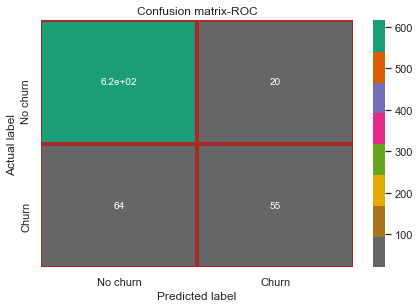

In [266]:
#PLOTTING CONFUSION MATRIX
sb.heatmap(pd.DataFrame(roc_cnf_matrix), annot=True,linecolor='brown',linewidths='2.6', cmap='Dark2_r' ,xticklabels=['No churn','Churn'], yticklabels=['No churn','Churn'])
plt.tight_layout()
plt.title('Confusion matrix-ROC')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
print( 'ROC-AUC',classification_report(y_test, lrocpreds) )

ROC-AUC               precision    recall  f1-score   support

           0       0.91      0.97      0.94       636
           1       0.73      0.46      0.57       119

    accuracy                           0.89       755
   macro avg       0.82      0.72      0.75       755
weighted avg       0.88      0.89      0.88       755



Text(0.5, 1.0, 'ACTUAL VS PREDICT OUTCOME-ROC-AUC LOGISTIC REGRESSION CHURN ANALYSIS')

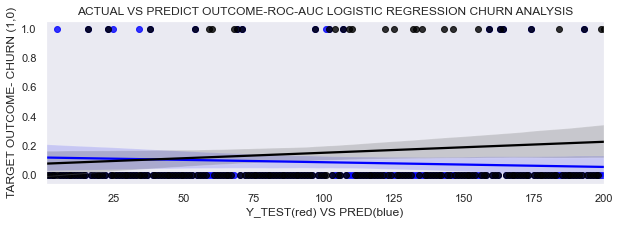

In [273]:
#plotting actual vs predicted
df1 = pd.DataFrame({'x':range(1,756),'orginal':y_test,'logistic_predict':lrocpreds})
df1
plt.figure(figsize=(10,3))
Y =sb.regplot(y='logistic_predict',x='x',data=df1.head(200),color='blue')
sb.regplot(y='orginal',x='x',data=df1.head(200),color='black')
plt.xlabel('Y_TEST(red) VS PRED(blue)')
plt.ylabel('TARGET OUTCOME- CHURN (1,0)')
plt.title('ACTUAL VS PREDICT OUTCOME-ROC-AUC LOGISTIC REGRESSION CHURN ANALYSIS')

the regression line deviates from actual to predicted


# MODEL 2 - LINEAR DISCRIMINANT ANALYSIS

In [124]:
# model buildong
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldamodel =  LinearDiscriminantAnalysis()

In [126]:
#fitting model 
ldafit = ldamodel.fit(x_train,y_train)
ldafit

LinearDiscriminantAnalysis()

In [127]:
#prediction
ldapred = ldafit.predict(x_test)
ldapred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [128]:
#performance metrics
#confusion matrix-lda
lda_cnf_matrix = confusion_matrix(y_test,ldapred)
lda_cnf_matrix

array([[618,  18],
       [ 69,  50]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

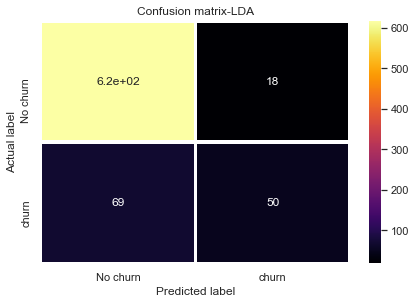

In [129]:
sb.heatmap(pd.DataFrame(lda_cnf_matrix), annot=True,linecolor='white',linewidths='2.6', cmap='inferno' ,xticklabels=['No churn','churn'], yticklabels=['No churn','churn'])
plt.tight_layout()
plt.title('Confusion matrix-LDA')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [130]:
print('lda model accu - ',accuracy_score(y_test, ldapred))

lda model accu -  0.8847682119205298


In [131]:
print( 'LDA',classification_report(y_test, ldapred) )

LDA               precision    recall  f1-score   support

           0       0.90      0.97      0.93       636
           1       0.74      0.42      0.53       119

    accuracy                           0.88       755
   macro avg       0.82      0.70      0.73       755
weighted avg       0.87      0.88      0.87       755



In [274]:
#evaluation model with cross validation technique
rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rkf_score = cross_val_score(ldamodel, x_train, y_train, scoring='accuracy', cv=rkf, n_jobs=1, error_score='raise')
#evaluation model score
print('Accuracy of cv model: %.3f' % (mean(rkf_score)))

Accuracy of cv model: 0.880


### tuning LDA

In [133]:
#defining parameters
paramlda = {'solver':('svd', 'lsqr', 'eigen'),'shrinkage':(0, 1, 0.5,0.002,0.09,0.01)}

In [134]:
#fit best parameters
ldatune = LinearDiscriminantAnalysis(solver='lsqr',shrinkage ='auto')
tunefit = ldatune.fit(x_train,y_train)
tunefit

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [135]:
#prediction with tuned model
ldatune_pred = tunefit.predict(x_test)
ldatune_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
# confusion matrix
lda_cnf_matrix = confusion_matrix(y_test,ldatune_pred)
lda_cnf_matrix

array([[620,  16],
       [ 69,  50]], dtype=int64)

Text(0.5, 12.5, 'Predicted label')

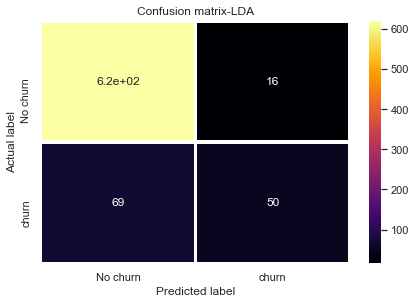

In [137]:
sb.heatmap(pd.DataFrame(lda_cnf_matrix), annot=True,linecolor='white',linewidths='2.6', cmap='inferno' ,xticklabels=['No churn','churn'], yticklabels=['No churn','churn'])
plt.tight_layout()
plt.title('Confusion matrix-LDA')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [280]:
#accuracy
print('lda tune model accu : %.2f ' % accuracy_score(y_test,ldatune_pred))

lda tune model accu : 0.89 


In [139]:
#classification report
print( 'LDA',classification_report(y_test, ldatune_pred)) 

LDA               precision    recall  f1-score   support

           0       0.90      0.97      0.94       636
           1       0.76      0.42      0.54       119

    accuracy                           0.89       755
   macro avg       0.83      0.70      0.74       755
weighted avg       0.88      0.89      0.87       755



Text(0.5, 1.0, 'ACTUAL VS PREDICT OUTCOME-Linear Discriminant- CHURN ANALYSIS')

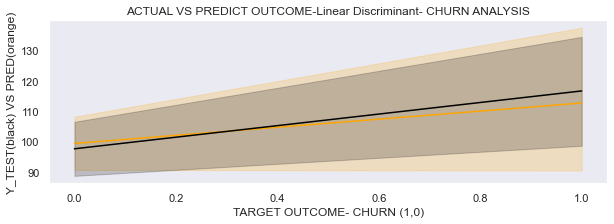

In [281]:
#plotting actual vs predicted
df2 = pd.DataFrame({'Sample':range(1,756),'orginal':y_test,'lda_predict':ldatune_pred})
df2
plt.figure(figsize=(10,3))
Y =sb.lineplot(x='lda_predict',y='Sample',data=df2.head(200),color='orange')
sb.lineplot(x='orginal',y='Sample',data=df2.head(200),color='black')
plt.ylabel('Y_TEST(black) VS PRED(orange)')
plt.xlabel('TARGET OUTCOME- CHURN (1,0)')
plt.title('ACTUAL VS PREDICT OUTCOME-Linear Discriminant- CHURN ANALYSIS')

lines of actual and predicted almost match , so the predicted and actual results match 90%

# MODEL 3 - GRADIENT BOOSTING

In [140]:
from sklearn.ensemble import GradientBoostingClassifier 

In [141]:
#defining model
gradient_booster = GradientBoostingClassifier()
param_gb = gradient_booster.get_params()
param_gb

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [142]:
#fit and predict
gbfit = gradient_booster.fit(x_train,y_train)
gbpredict= gbfit.predict(x_test)
gbpredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

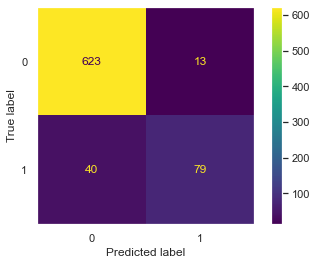

In [144]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix as pcm
pcm(gradient_booster,x_test,y_test)

In [283]:
accuracygb = accuracy_score(y_test,gbpredict)
print('GRADIENT BOOST ACCU %.2f'% accuracygb)

GRADIENT BOOST ACCU 0.93


In [284]:
#classification report
print(classification_report(y_test,gbpredict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       636
           1       0.86      0.66      0.75       119

    accuracy                           0.93       755
   macro avg       0.90      0.82      0.85       755
weighted avg       0.93      0.93      0.93       755



### TUNING GRADIENT BOOSTING CLASSIFIER MODEL  PARAMS

In [147]:
#cross validation technique
kf = KFold(n_splits=5,random_state=42,shuffle=True)
n_scores = cross_val_score(gradient_booster, x_train, y_train, scoring='accuracy', cv=kf, n_jobs=1, error_score='raise')
print('evaluation model - KFold accuracy: %.3f' % (mean(n_scores)))

evaluation model - KFold accuracy: 0.924


In [148]:
#tuning hyper parameters
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':(20,80,100),'max_depth':range(5,6,2), 'min_samples_split':(2,1),
               'max_features':('auto','sqrt','log')}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.9,subsample=0.9,random_state=10),
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=kf)
gsearch1.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(learning_rate=0.9,
                                                  random_state=10,
                                                  subsample=0.9),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 6, 2),
                         'max_features': ('auto', 'sqrt', 'log'),
                         'min_samples_split': (2, 1),
                         'n_estimators': (20, 80, 100)},
             scoring='roc_auc')

In [149]:
gsearch1.best_params_ # RESULTING BEST PARAMETERS FROM gridsearchcv tech

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [150]:
#tuned model score
gsearch1.best_score_

0.9571769717452103

In [151]:
# training with tuned model parameters
gradient_booster_C = GradientBoostingClassifier(loss='deviance',learning_rate=0.7,
                                                criterion='friedman_mse',subsample=0.9,
                                                max_depth=5,max_features= 'auto',
                                                min_samples_split=2,n_estimators=100)

In [152]:
 gradient_booster_C.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.7,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 0.9,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [154]:
gradient_booster_C.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=5, max_features='auto',
                           subsample=0.9)

In [155]:
# important features of GRADIENT BOOSOTING algo
feature_importances = pd.DataFrame(gradient_booster_C.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Tenure,0.339923
CashbackAmount,0.098212
NumberOfAddress,0.095589
DaySinceLastOrder,0.074556
Complain,0.070547
WarehouseToHome,0.065360
OrderAmountHikeFromlastYear,0.051568
MaritalStatus,0.038446
SatisfactionScore,0.034115
NumberOfDeviceRegistered,0.031114


In [156]:
#prediction
gbcpredict = gradient_booster_C.predict(x_test)
gbcpredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

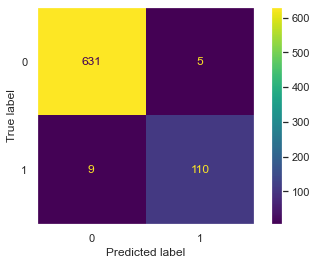

In [157]:
#confusion matrix
pcm(gradient_booster_C,x_test,y_test)

In [158]:
#accuracy
accuracygbtune = accuracy_score(y_test,gbcpredict)
print(accuracygbtune,'- TUNED GRADIENT BOOST ACCU')

0.9814569536423841 - TUNED GRADIENT BOOST ACCU


In [159]:
#classification report
print('GB',classification_report(y_test,gbcpredict))

GB               precision    recall  f1-score   support

           0       0.99      0.99      0.99       636
           1       0.96      0.92      0.94       119

    accuracy                           0.98       755
   macro avg       0.97      0.96      0.96       755
weighted avg       0.98      0.98      0.98       755



Text(0.5, 1.0, 'ACTUAL VS PREDICT OUTCOME- Gradientboosting Classifier- CHURN ANALYSIS')

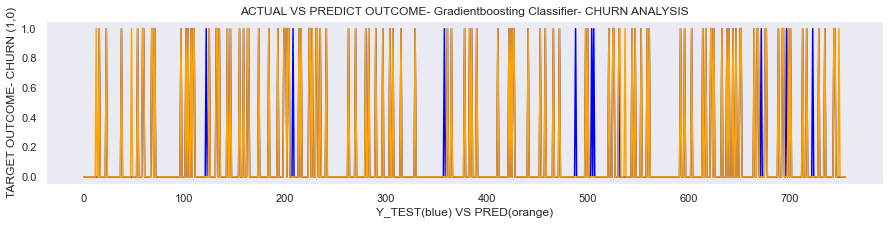

In [285]:
#plotting actual vs predicted
df3 = pd.DataFrame({'Sample':range(1,756),'orginal':y_test,'gb_predict':gbcpredict})
df3
plt.figure(figsize=(15,3))

sb.lineplot(y='orginal',x='Sample',data=df3,color='blue')
sb.lineplot(y='gb_predict',x='Sample',data=df3,color='orange')
plt.xlabel('Y_TEST(blue) VS PRED(orange)')
plt.ylabel('TARGET OUTCOME- CHURN (1,0)')
plt.title('ACTUAL VS PREDICT OUTCOME- Gradientboosting Classifier- CHURN ANALYSIS')

Only 2% of data are predicted with different labels. The predicted and actual values 98% match

# TASK 2 - ORDER COUNT ESTIMATION

##### dataset duplicate

In [160]:
order_data = cust_churndata.copy()
order_data.transpose()

,0,3,5,11,12,13,14,17,18,19,...,5616,5617,5618,5619,5620,5624,5625,5627,5628,5629
Churn,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
Tenure,4.00,0.00,0.00,11.00,0.00,0.00,9.00,0.00,0.00,19.00,...,9.00,14.00,9.00,3.00,3.00,1.00,10.00,1.00,23.0,8.00
PreferredLoginDevice,1.00,2.00,0.00,1.00,2.00,2.00,1.00,1.00,0.00,1.00,...,0.00,2.00,1.00,1.00,1.00,1.00,0.00,1.00,0.0,1.00
CityTier,3.00,3.00,1.00,1.00,1.00,1.00,3.00,3.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,3.0,1.00
WarehouseToHome,6.00,15.00,22.00,6.00,11.00,15.00,15.00,11.00,13.00,20.00,...,25.00,9.00,8.00,20.00,35.00,12.00,30.00,11.00,9.0,15.00
PreferredPaymentMode,2.00,2.00,2.00,2.00,6.00,5.00,1.00,3.00,2.00,2.00,...,2.00,1.00,2.00,4.00,1.00,4.00,1.00,2.00,1.0,1.00
Gender,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,...,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.0,1.00
HourSpendOnApp,3.00,2.00,3.00,3.00,2.00,3.00,3.00,2.00,3.00,3.00,...,4.00,4.00,4.00,3.00,4.00,2.00,3.00,3.00,4.0,3.00
NumberOfDeviceRegistered,3.00,4.00,5.00,4.00,3.00,4.00,4.00,4.00,5.00,3.00,...,4.00,4.00,6.00,5.00,5.00,5.00,2.00,2.00,5.0,2.00
PreferedOrderCat,3.00,3.00,4.00,1.00,0.00,0.00,1.00,3.00,3.00,4.00,...,3.00,4.00,4.00,3.00,4.00,4.00,3.00,3.00,3.0,3.00


##### Grouped by order count

In [161]:
order = pd.DataFrame(order_data.groupby('OrderCount').mean().transpose())
order

OrderCount,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
Churn,0.120983,0.201952,0.194631,0.149254,0.066116,0.117647,0.204082,0.201550,0.095238,0.250000,0.1600,0.000000,0.000000,0.000000,0.285714,0.50
Tenure,8.613422,8.235509,8.771812,9.261194,10.347107,9.500000,9.523810,9.472868,9.452381,10.458333,9.0400,15.708333,17.818182,18.555556,20.142857,15.00
PreferredLoginDevice,1.013233,0.875534,0.852349,0.723881,0.867769,0.882353,0.836735,0.798450,0.714286,0.916667,0.9200,0.625000,0.636364,0.666667,0.857143,0.50
CityTier,1.777883,1.643685,1.583893,1.604478,1.768595,1.872549,1.925170,1.775194,1.904762,1.500000,1.9600,2.000000,1.909091,1.222222,2.428571,1.00
WarehouseToHome,15.397921,15.953020,15.446309,16.097015,15.991736,15.137255,16.183673,16.403101,13.142857,19.000000,15.8000,14.000000,18.363636,14.333333,14.142857,19.00
PreferredPaymentMode,2.351607,2.297132,2.201342,2.313433,2.107438,2.294118,2.394558,2.162791,1.809524,2.416667,2.2400,2.291667,2.363636,2.111111,2.142857,1.50
Gender,0.604915,0.613789,0.624161,0.567164,0.520661,0.578431,0.571429,0.581395,0.666667,0.541667,0.6000,0.583333,0.363636,0.555556,0.142857,0.50
HourSpendOnApp,2.413043,3.323368,3.117450,2.955224,3.016529,3.019608,2.721088,3.286822,3.000000,3.375000,2.6400,2.916667,2.636364,2.888889,2.714286,3.00
NumberOfDeviceRegistered,3.181474,4.096400,3.963087,3.828358,3.685950,3.666667,3.428571,3.875969,3.857143,3.833333,3.9600,4.458333,3.636364,3.555556,3.428571,3.50
PreferedOrderCat,2.593573,3.334960,3.338926,2.820896,2.809917,2.970588,2.578231,2.968992,2.238095,2.416667,2.7600,2.833333,2.090909,1.777778,1.142857,3.00


##### Indep Dep split

In [287]:
#indep
predictor = order_data.drop(['OrderCount'],axis=1)
print(predictor.columns)
predictor

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,3,2,2,9,1,11.0,1.0,5.0,159.93
3,1,0.0,2,3,15.0,2,1,2.0,4,3,5,2,8,0,23.0,0.0,3.0,134.07
5,1,0.0,0,1,22.0,2,0,3.0,5,4,5,2,2,1,22.0,4.0,7.0,139.19
11,1,11.0,1,1,6.0,2,1,3.0,4,1,3,2,10,1,13.0,0.0,0.0,153.81
12,1,0.0,2,1,11.0,6,1,2.0,3,0,3,2,2,1,13.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,1,3,12.0,4,0,2.0,5,4,3,2,2,0,19.0,2.0,1.0,154.66
5625,0,10.0,0,1,30.0,1,1,3.0,2,3,1,1,6,0,18.0,1.0,4.0,150.71
5627,0,1.0,1,1,11.0,2,1,3.0,2,3,4,1,3,1,21.0,1.0,4.0,186.42
5628,0,23.0,0,3,9.0,1,1,4.0,5,3,4,1,4,0,15.0,2.0,9.0,178.90


In [288]:
#dep
target = order_data.OrderCount
print(target)


0       1.0
3       1.0
5       6.0
11      1.0
12      2.0
       ... 
5624    2.0
5625    2.0
5627    2.0
5628    2.0
5629    2.0
Name: OrderCount, Length: 3774, dtype: float64


##### train test split

In [165]:
#train -test data
from sklearn.model_selection import train_test_split
x_sstrain,x_sstest,y_sstrain,y_sstest = train_test_split(predictor,target,train_size =0.8,random_state=2)

In [289]:
x_sstrain
print(" x_train shape", x_sstrain.shape," y_train shape", y_sstrain.shape)
x_sstrain

 x_train shape (3019, 18)  y_train shape (3019,)


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,DaySinceLastOrder,CashbackAmount
2758,0,0.0,2,1,8.0,4,1,2.0,3,4,3,1,7,1,19.0,0.0,2.0,139.77
2477,0,13.0,2,3,20.0,2,0,2.0,3,3,5,1,2,0,15.0,0.0,2.0,146.39
4412,0,3.0,2,1,22.0,2,1,3.0,4,4,1,2,3,0,20.0,2.0,6.0,148.40
4681,0,1.0,0,3,10.0,1,0,4.0,2,3,1,1,3,1,21.0,2.0,5.0,171.47
4514,0,4.0,0,3,32.0,6,0,3.0,4,3,3,1,9,1,13.0,3.0,3.0,172.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5418,0,3.0,2,1,11.0,6,0,4.0,5,4,5,1,3,0,14.0,1.0,1.0,146.09
2787,1,0.0,2,1,7.0,1,1,2.0,3,4,1,1,10,1,14.0,2.0,2.0,147.87
4015,0,16.0,1,1,15.0,2,1,3.0,4,4,3,2,6,0,14.0,2.0,1.0,164.68
4057,0,1.0,2,1,9.0,6,1,3.0,4,4,4,1,3,0,12.0,2.0,3.0,147.26


In [291]:
print("x_test= shape", x_sstest.shape, " y_test shape", y_sstest.shape)

x_test= shape (755, 18)  y_test shape (755,)


In [167]:
y_sstrain

2758    1.0
2477    1.0
4412    2.0
4681    2.0
4514    3.0
       ... 
5418    2.0
2787    2.0
4015    2.0
4057    2.0
4927    2.0
Name: OrderCount, Length: 3019, dtype: float64

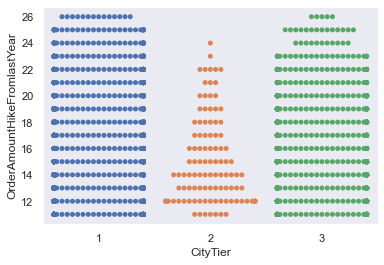

In [286]:
#plot train data
sb.swarmplot(x='CityTier',y='OrderAmountHikeFromlastYear',data=x_sstrain)

# Model 2.1 RANDOM FOREST REGRESSOR

In [229]:
# since it's dep variable is continous variable , Regression analysis

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
# defining model
rfc_model = RandomForestRegressor(n_estimators=200,random_state=5)


In [182]:
#fitting train values to model
rfc_model.fit(x_sstrain,y_sstrain)

RandomForestRegressor(n_estimators=200, random_state=5)

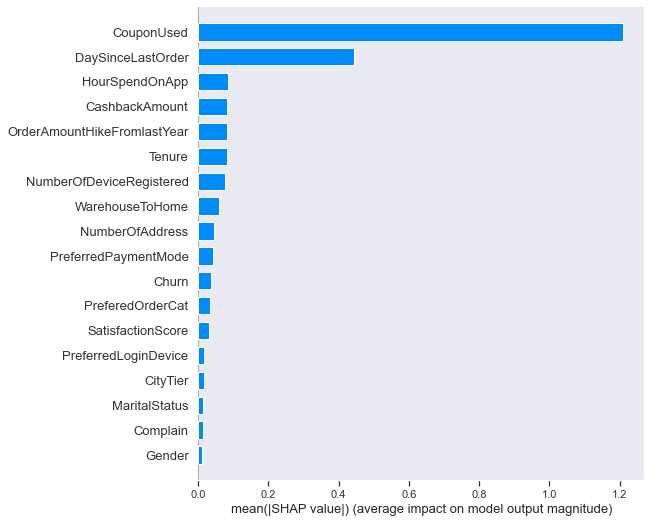

In [183]:
#feature importance
import shap #each feature contribution to the prediction
explainer = shap.TreeExplainer(rfc_model)
shap_values = explainer.shap_values(x_sstest)
shap.summary_plot(shap_values, x_sstest,plot_type = 'bar')

In [230]:
#predicting
rfc_predict = rfc_model.predict(x_sstest).round()
rfc_predict

array([ 1.,  2.,  3.,  8.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,
        2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  6.,  1.,  9.,
        1.,  2.,  4.,  1.,  2.,  9.,  2.,  2.,  2.,  7.,  4.,  7.,  2.,
        2.,  8.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  2.,
        1.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.,  1.,  3.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  7.,  5.,  2.,  2.,  5.,  3.,  3.,
        2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  5.,  7.,  1.,  2.,
        2.,  2.,  8.,  7.,  2.,  2.,  1.,  1.,  2.,  2.,  4.,  1.,  2.,
        3.,  2.,  6.,  3.,  1.,  7.,  1.,  1.,  1.,  4.,  1.,  4.,  6.,
        3.,  4.,  3.,  4.,  4.,  2.,  8.,  2.,  3.,  6.,  1.,  1.,  8.,
        2.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  3.,  2.,  2.,  2.,
        2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  7.,  2.,  7.,
        2.,  1.,  2.,  1., 14.,  1.,  2.,  2.,  2.,  3.,  2.,  8.,  1.,
        4.,  7.,  8.,  2.,  2.,  1.,  2.,  1.,  3.,  1.,  2.,  2

In [236]:
#performance metrics
from sklearn.metrics import r2_score
r2_score(y_sstest,rfc_predict) # variance of the model

0.683299674406463

In [228]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_sstest,rfc_predict)  # error in pred 

1.7920529801324503

In [231]:
rf_pred_compare = pd.DataFrame({'x':range(0,755),'actual':y_sstest,'predictedr':rfc_predict})
rf_pred_compare

,x,actual,predictedr
2593,0,1.0,1.0
3402,1,2.0,2.0
3375,2,2.0,3.0
3634,3,8.0,8.0
1026,4,1.0,2.0
...,...,...,...
1038,750,7.0,2.0
5405,751,3.0,2.0
2943,752,2.0,2.0
2036,753,1.0,1.0


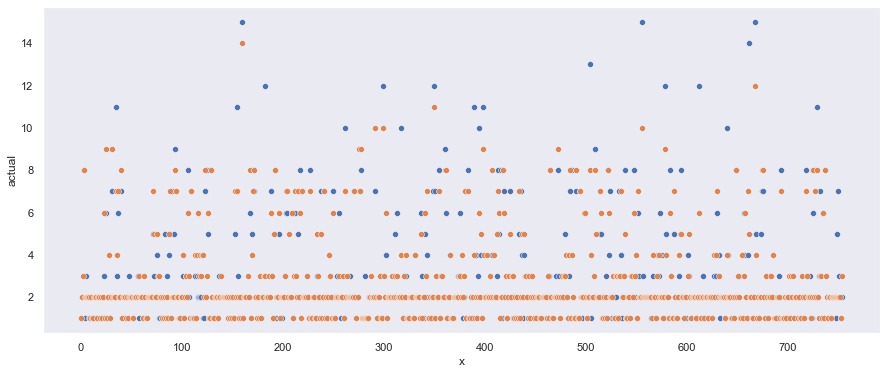

In [232]:
#plotting actual vs pred
plt.figure(figsize=(15,6))
sb.scatterplot(x='x',y='actual',data=rf_pred_compare,palette='Oranges')
sb.scatterplot(x='x',y='predictedr',data=rf_pred_compare,palette='Blues')

In [ ]:
#MODEL 2.2 XGBOOST REGRESSOR

In [1]:
# XG BOOST

In [208]:
! pip install xgboost


In [209]:
from xgboost import XGBRegressor

In [210]:
#model building
xgmodel = XGBRegressor(booster = 'gbtree',objective="reg:squarederror",earning_rate=0.3)


In [211]:
# fit to model
xg_fit = xgmodel.fit(x_sstrain,y_sstrain)
xg_fit

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
#pred the results
xg_predict =  xg_fit.predict(x_sstest).round()
xg_predict

array([ 1.,  2.,  3.,  6.,  3.,  3.,  2.,  2.,  1.,  1.,  2.,  1.,  1.,
        2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  7.,  1.,  8.,
        1.,  2.,  3.,  1.,  2.,  6.,  2.,  1.,  1.,  6.,  3.,  8.,  2.,
        2.,  8.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  3.,  2.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  7.,  4.,  2.,  2.,  4.,  2.,  2.,
        1.,  2.,  1.,  2.,  2.,  2.,  1.,  3.,  1.,  5.,  6.,  1.,  2.,
        2.,  2.,  8.,  6.,  2.,  2.,  1.,  1.,  1.,  2.,  4.,  2.,  2.,
        4.,  2.,  5.,  2.,  1.,  7.,  1.,  1.,  1.,  3.,  1.,  3.,  4.,
        2.,  3.,  2.,  2.,  6.,  1.,  9.,  2.,  4.,  5.,  1.,  1.,  8.,
        2.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  3.,  2.,  2.,
        2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  1.,  5.,  2.,  7.,
        1.,  1.,  2.,  1., 15.,  1.,  3.,  2.,  2.,  2.,  2.,  6.,  1.,
        4.,  7.,  8.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,  3

In [214]:
#regression score - variance
r2_score(y_sstest,xg_predict)

0.7385408250643157

In [215]:
#error value
mean_squared_error(y_sstest,xg_predict)

1.4794701986754968

In [216]:
xg_pred_compare = pd.DataFrame({'x':range(0,755),'actual':y_sstest,'predicted':xg_predict})
xg_pred_compare

,x,actual,predicted
2593,0,1.0,1.0
3402,1,2.0,2.0
3375,2,2.0,3.0
3634,3,8.0,6.0
1026,4,1.0,3.0
...,...,...,...
1038,750,7.0,3.0
5405,751,3.0,2.0
2943,752,2.0,2.0
2036,753,1.0,1.0


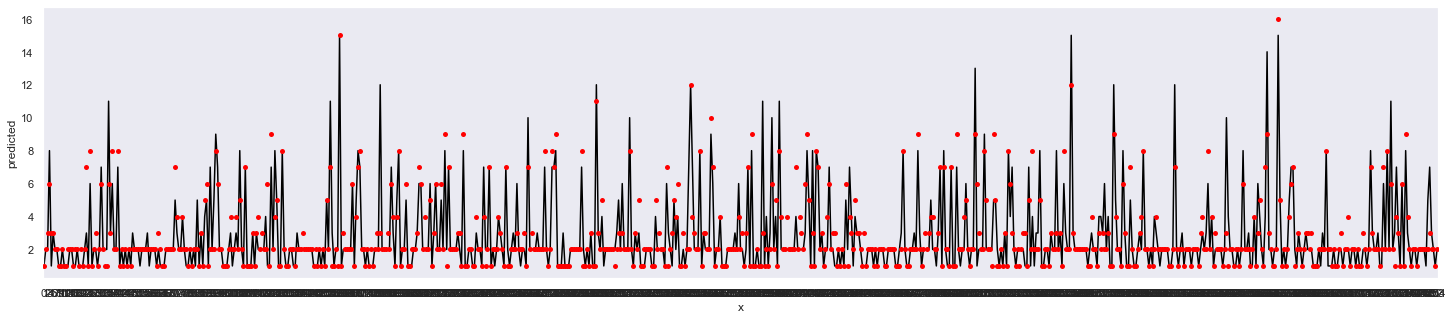

In [237]:
#plotting actual vs xg predict
plt.figure(figsize=(25,5))
sb.lineplot(x='x',y='actual',data=xg_pred_compare,color='black')
sb.swarmplot(x='x',y='predicted',data=xg_pred_compare,color='red')
